In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [2]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(x_train.dtype, y_train.dtype)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)
uint8 uint8


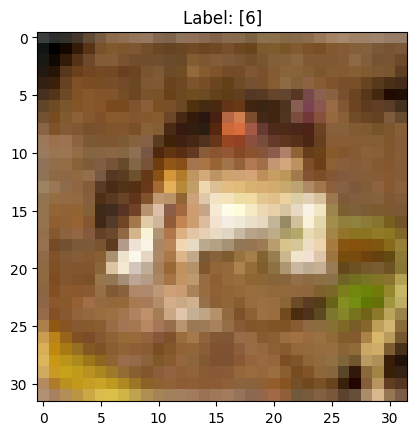

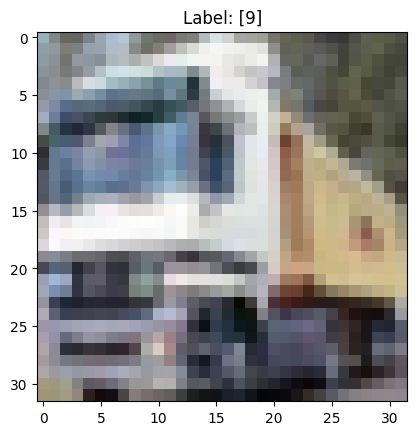

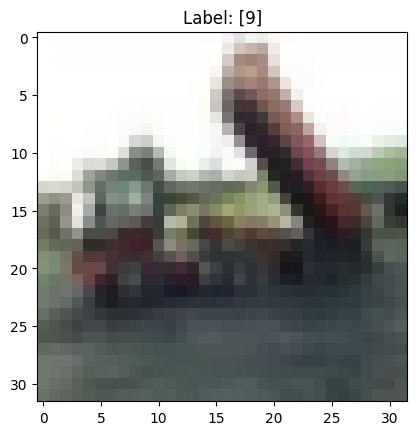

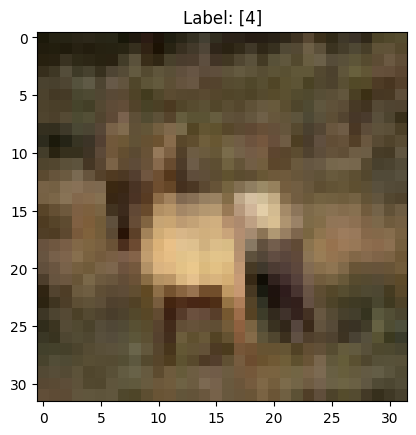

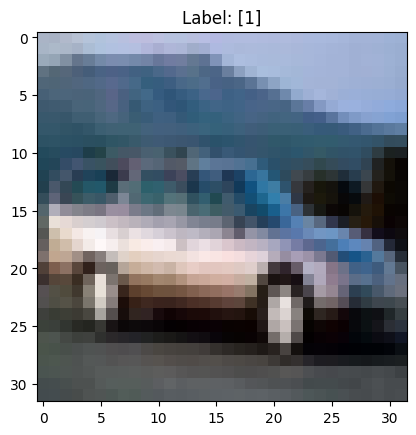

In [3]:
# Plot first 5 images in the training set
for i in range(5):
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.show()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# Split the training data further into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
# Build the CNN model
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val)) #Train the CNN Model

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.3219 - loss: 1.8296 - val_accuracy: 0.5086 - val_loss: 1.3751
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.5254 - loss: 1.3103 - val_accuracy: 0.5761 - val_loss: 1.1989
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.5996 - loss: 1.1278 - val_accuracy: 0.6239 - val_loss: 1.0553
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.6408 - loss: 1.0263 - val_accuracy: 0.6312 - val_loss: 1.0466
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.6708 - loss: 0.9385 - val_accuracy: 0.6602 - val_loss: 0.9654
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 88ms/step - accuracy: 0.6959 - loss: 0.8645 - val_accuracy: 0.6766 - val_loss: 0.9322
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.7139 - loss: 0.8180 - val_accuracy: 0.6876 - val_loss: 0.9046
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7341 - loss: 0.7583 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6896 - loss: 0.9234
Test accuracy (CNN): 0.684499979019165


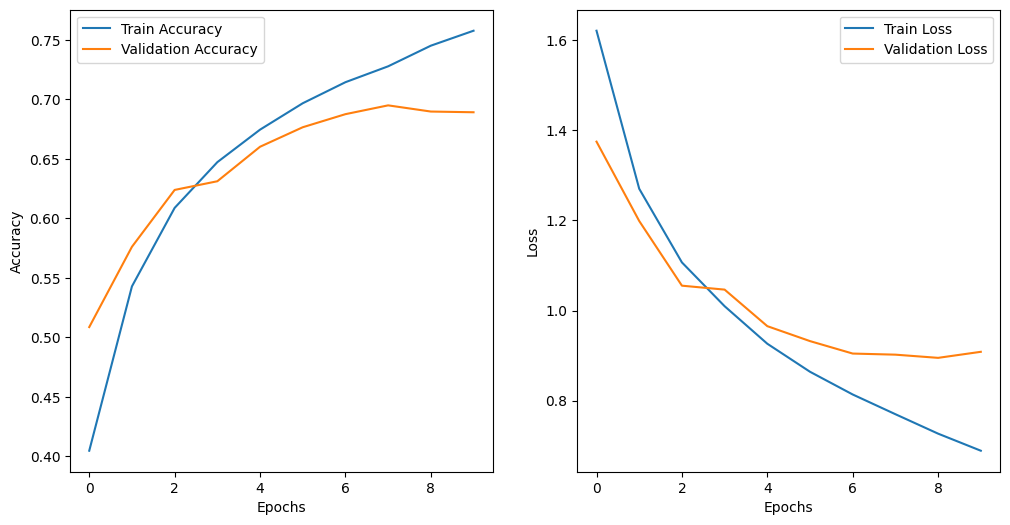

In [9]:
# Evaluate CNN on the test set
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test, y_test)
print(f"Test accuracy (CNN): {test_acc_cnn}")

# Plot the training and validation accuracy and loss for CNN
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()